<a href="https://colab.research.google.com/github/maurosc3ner/ml_python_playground/blob/main/book_fchollet/dl_chollet_ch2_ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2

## Imports


In [ ]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
from tensorflow.keras.datasets import mnist



In [ ]:
(train_x,train_y), (test_x,test_y) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print(train_x.shape)
print(len(train_y))
print(train_y)

print(test_x.shape)

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]
(10000, 28, 28)


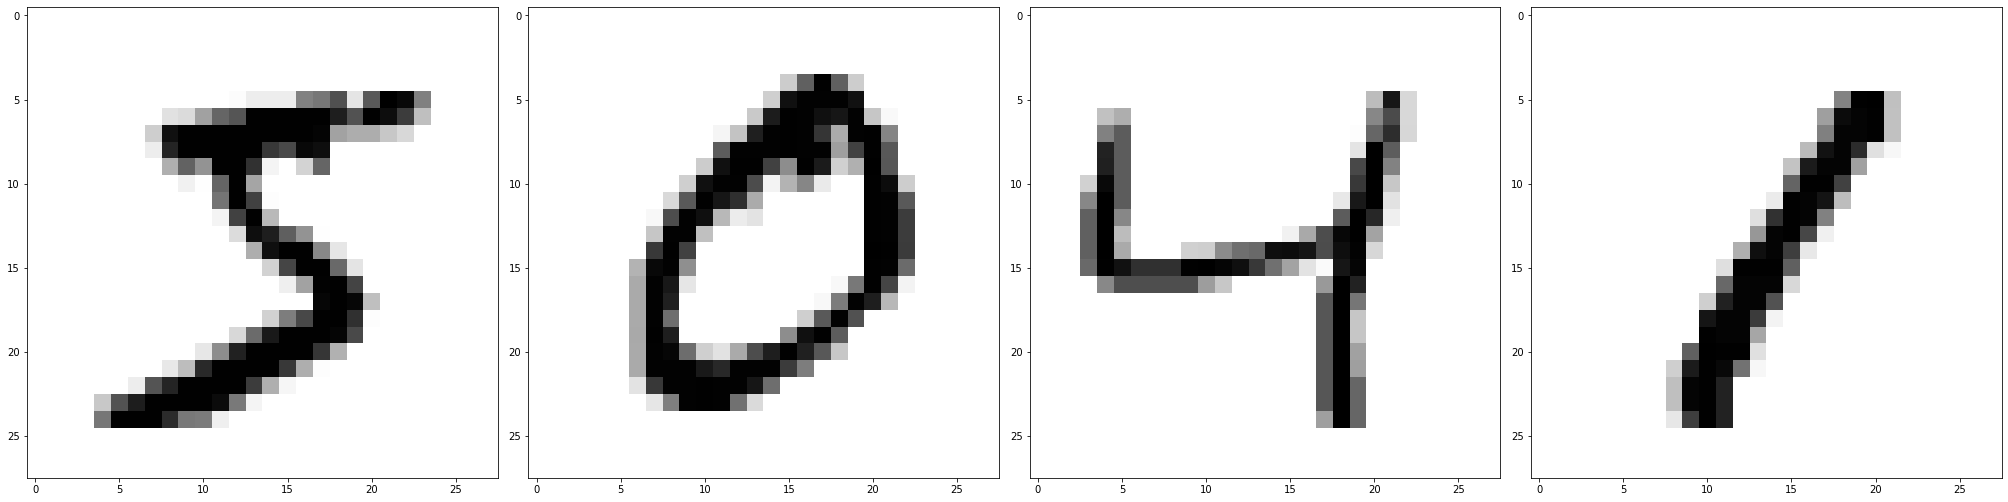

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 4, figsize=(28,28))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img, cmap=plt.cm.binary)
    plt.tight_layout()
    plt.show()

plotImages(train_x[:4])  # Plot images 0-4

In [ ]:
# let's convert to array
train_x = train_x.reshape(-1,28,28,1).astype('float32')/255
test_x = test_x.reshape(-1,28,28,1).astype('float32')/255

print(train_x.shape,test_x.shape)


(60000, 28, 28, 1) (10000, 28, 28, 1)


## 2.1. MNIST hello world

In [ ]:
model1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(512,activation="relu",input_shape = (28, 28, 1)),
    tf.keras.layers.Dense(10, activation="softmax") 
])
model1.compile(optimizer='rmsprop',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1=model1.fit(train_x, 
           train_y, 
           epochs=5, batch_size=32,
           validation_data=[test_x, test_y],verbose=2)

Epoch 1/5
1875/1875 - 4s - loss: 0.0264 - accuracy: 0.9919 - val_loss: 0.0675 - val_accuracy: 0.9831 - 4s/epoch - 2ms/step
Epoch 2/5
1875/1875 - 4s - loss: 0.0198 - accuracy: 0.9940 - val_loss: 0.0743 - val_accuracy: 0.9810 - 4s/epoch - 2ms/step
Epoch 3/5
1875/1875 - 5s - loss: 0.0159 - accuracy: 0.9951 - val_loss: 0.0870 - val_accuracy: 0.9794 - 5s/epoch - 2ms/step
Epoch 4/5
1875/1875 - 4s - loss: 0.0127 - accuracy: 0.9962 - val_loss: 0.0746 - val_accuracy: 0.9839 - 4s/epoch - 2ms/step
Epoch 5/5
1875/1875 - 5s - loss: 0.0090 - accuracy: 0.9976 - val_loss: 0.0793 - val_accuracy: 0.9826 - 5s/epoch - 3ms/step


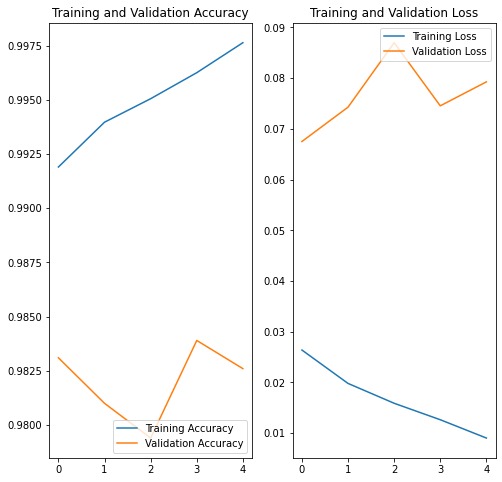

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

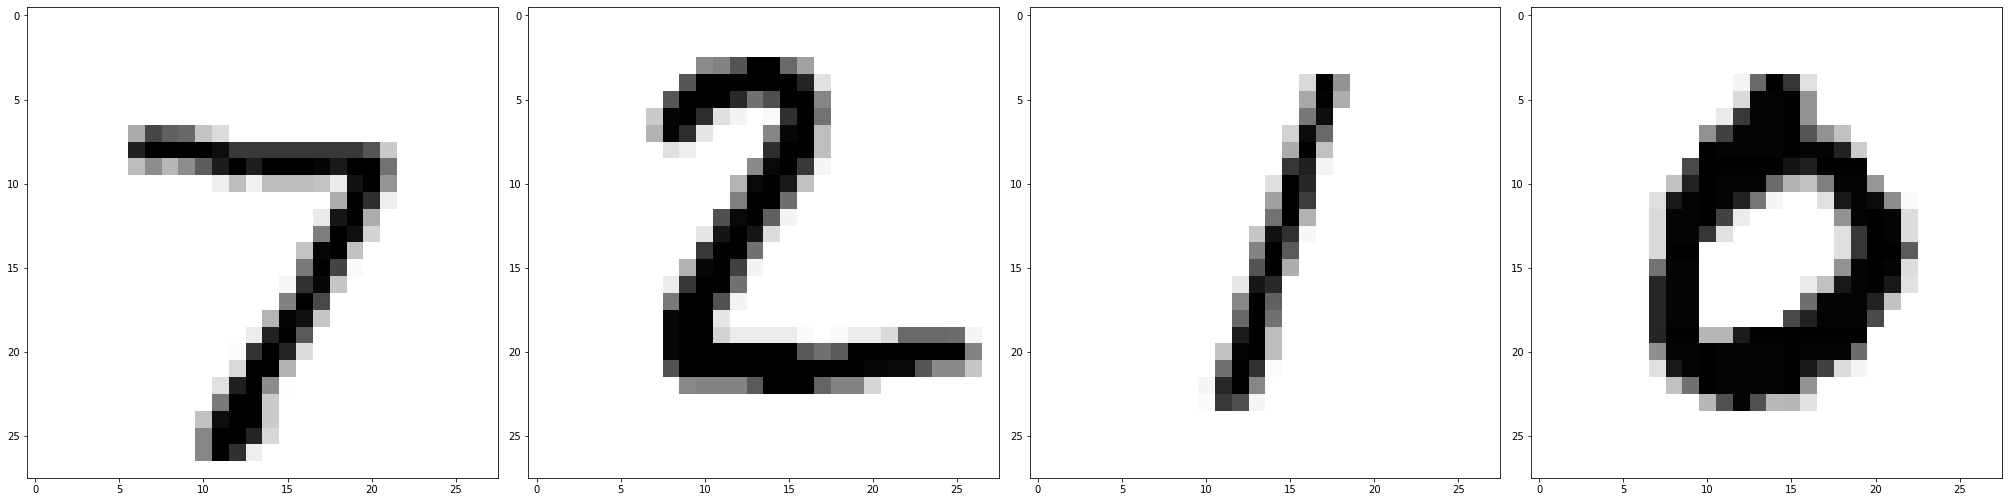

In [ ]:
plotImages(test_x[:10])  # Plot images 0-4

In [ ]:
#make predictions
predictions=model1.predict(test_x[0:5])

print(predictions.shape)
print(predictions)

print(predictions.argmax(axis=1))
print(test_y[0:5])

1/1 [==============================] - 0s 34ms/step
(5, 10)
[[4.35582593e-14 1.39655715e-17 3.65140600e-12 1.00105133e-08
  3.23333075e-20 6.01201942e-18 5.99262265e-19 1.00000000e+00
  6.19152021e-16 4.25881067e-11]
 [9.11223611e-14 7.21669557e-10 1.00000000e+00 1.20859555e-11
  1.06099368e-19 6.45146625e-15 4.50553342e-15 2.00052207e-24
  8.12416107e-12 7.38153633e-22]
 [4.32772401e-10 9.99989510e-01 1.78368202e-06 9.93369387e-10
  3.61933502e-07 3.73822662e-09 7.64665344e-08 3.73529610e-06
  4.47838147e-06 5.13963004e-11]
 [1.00000000e+00 1.76570424e-16 2.23830524e-12 3.59788064e-17
  2.57833685e-13 2.38477061e-14 1.14741050e-09 5.01522261e-12
  5.94285791e-19 4.06956017e-13]
 [3.87785937e-09 3.41958009e-14 4.02908748e-11 1.35704843e-14
  9.99945045e-01 2.24792692e-13 2.24729724e-09 2.68376041e-08
  2.73865219e-11 5.49420074e-05]]
[7 2 1 0 4]
[7 2 1 0 4]


## 2.2. Numpy and broadcasting

In [ ]:
myslice=train_x[20:100]
print(myslice.shape)

myslice=train_x[20:100,:,:]
print(myslice.shape)

myslice=train_x[20:100,0:28,0:28]
print(myslice.shape)

(80, 28, 28, 1)
(80, 28, 28, 1)
(80, 28, 28, 1)


numpy broadcasting is a process to match axes/dimensions in a tensor operation by repeating the smaller tensor

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10)) 
y = np.random.random((32, 10))    
z = np.maximum(x, y)   

print(x.shape,y.shape,z.shape)

(64, 3, 32, 10) (32, 10) (64, 3, 32, 10)


# Chapter 3

### 3.5.1. Constant tensors and variables

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

#numpy-like initializers
print(tf.ones(shape=(2,1)))
print(tf.zeros(shape=(2,1)))
#following a distribution
print(tf.random.uniform(shape=(5,1),minval=0.,maxval=1.))
print(tf.random.normal(shape=(5,1),mean=0.,stddev=1.))

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.12775564]
 [0.7693862 ]
 [0.4482144 ]
 [0.6134242 ]
 [0.30930245]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[ 0.03270565]
 [ 0.05219269]
 [-1.7382535 ]
 [ 0.5297244 ]
 [ 1.1762735 ]], shape=(5, 1), dtype=float32)


Tensors are not assignables like numpy

In [ ]:
x=np.ones(shape=(2,2))
print(x)
x[0,0]=0
print(x)

[[1. 1.]
 [1. 1.]]
[[0. 1.]
 [1. 1.]]


In [ ]:
x=tf.ones(shape=(2,2))
x[0,0]=0

TypeError: ignored

You need to declare a tensor as variable







In [ ]:
x_as_v=tf.Variable(initial_value=tf.random.normal(shape=(4,1)))
print(x_as_v)
#assign full values
x_as_v.assign(tf.ones((4,1)))
print(x_as_v)
#replace an element
x_as_v[0,0].assign(10)
print(x_as_v)
#add an element
x_as_v.assign_add(tf.ones((4,1)))
print(x_as_v)
#substract an element
x_as_v.assign_sub(3*tf.ones((4,1)))
print(x_as_v)

<tf.Variable 'Variable:0' shape=(4, 1) dtype=float32, numpy=
array([[-1.6980284 ],
       [-0.34172356],
       [-0.998258  ],
       [ 0.6500659 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(4, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(4, 1) dtype=float32, numpy=
array([[10.],
       [ 1.],
       [ 1.],
       [ 1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(4, 1) dtype=float32, numpy=
array([[11.],
       [ 2.],
       [ 2.],
       [ 2.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(4, 1) dtype=float32, numpy=
array([[ 8.],
       [-1.],
       [-1.],
       [-1.]], dtype=float32)>


### 3.5.2 Tensor operations

In [ ]:
a=2*tf.ones((2,2))
b=tf.square(a)
c=tf.sqrt(b)
#element wise add
d=b+c
#product of tensors
e=tf.matmul(a,b)
#element wise
f=e*a
print(a,b,c,d,e,f)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[6. 6.]
 [6. 6.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[16. 16.]
 [16. 16.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[32. 32.]
 [32. 32.]], shape=(2, 2), dtype=float32)


### 3.5.3. GradientTape

In [ ]:
input_x=tf.Variable(initial_value=3.)

with tf.GradientTape() as tape:
  y=tf.square(input_x)
gradient=tape.gradient(y,input_x)
#the derivative of x^2 is 2*x
print(gradient,y)

tf.Tensor(6.0, shape=(), dtype=float32) tf.Tensor(9.0, shape=(), dtype=float32)


Trainable variables are watched by default, however, due the computation budget, other tensors need to be tagged in order to be watched (constants)

In [ ]:
x_constant=tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(x_constant)
  y=tf.square(x_constant)
gradient=tape.gradient(y,x_constant)
print(gradient,y)

tf.Tensor(6.0, shape=(), dtype=float32) tf.Tensor(9.0, shape=(), dtype=float32)


In [ ]:
# second order derivative
time=tf.Variable(1.)
with tf.GradientTape() as tape1:
  with tf.GradientTape() as tape2:
    position=4.9*time**2
  speed=tape2.gradient(position,time)  
accel=tape1.gradient(speed,time)
print(position, speed,accel,sep="\n")

tf.Tensor(4.9, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


### 3.5.4. Pure linear classifier

Let's start by creating the dataset (synthetic):

In [ ]:
nun_samples=1000
class_a=np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=nun_samples
)

class_b=np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=nun_samples
)

inputs=np.vstack((class_a,class_b)).astype(np.float32)
print(class_a,class_a.shape,inputs.shape)
# labels
targets = np.vstack((
    np.zeros(shape=(nun_samples,1),dtype=np.float32),
    np.ones(shape=(nun_samples,1),dtype=np.float32)
                     )
)
print(targets,targets.shape)

[[ 0.17091229  3.63272216]
 [-1.36569498  3.8780781 ]
 [-0.95334041  2.15135177]
 ...
 [ 0.21361771  3.51116168]
 [-0.86586406  3.0468758 ]
 [-1.41680388  1.1013253 ]] (1000, 2) (2000, 2)
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]] (2000, 1)


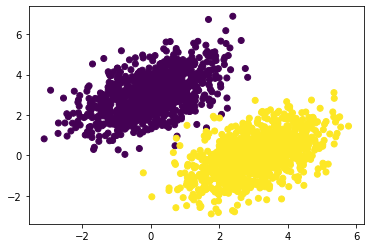

In [ ]:
plt.scatter(x=inputs[:,0],
            y=inputs[:,1],
            c=targets[:])
plt.show()

Let's create the linear classifier (affine transformation)

In [ ]:
lr=0.1
input_dim=2 # because 2D points
output_dim=1 # number of clases 0 or 1
weights=tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim))
)
b_intersect=tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

#forward pass
def model(inputs):
  return tf.matmul(inputs,weights)+b_intersect

#loss function mean squared error
def elementwise_loss(observed,predicted):
  per_sample_losses=tf.square(observed-predicted)
  return tf.reduce_mean(per_sample_losses)

In [ ]:
def trainer(inputs,targets):
  with tf.GradientTape() as tape:
    pred = model(inputs)
    loss = elementwise_loss(targets,pred)
  #compute gradient
  grad_w,grad_b=tape.gradient(loss,[weights,b_intersect])
  #update weights
  weights.assign_sub(lr*grad_w)
  b_intersect.assign_sub(lr*grad_b)
  return loss

In [ ]:
#epochs with full batching
for step in range(40):
  loss = trainer(inputs,targets)
  print("Step:{0}, Loss:{1}".format(step,loss))

Step:0, Loss:3.3008620738983154
Step:1, Loss:0.18769493699073792
Step:2, Loss:0.10868021845817566
Step:3, Loss:0.09363682568073273
Step:4, Loss:0.0867423415184021
Step:5, Loss:0.08126471191644669
Step:6, Loss:0.07635565102100372
Step:7, Loss:0.07187888771295547
Step:8, Loss:0.06778689473867416
Step:9, Loss:0.06404544413089752
Step:10, Loss:0.06062433496117592
Step:11, Loss:0.057496167719364166
Step:12, Loss:0.054635822772979736
Step:13, Loss:0.052020393311977386
Step:14, Loss:0.04962889105081558
Step:15, Loss:0.047442153096199036
Step:16, Loss:0.045442648231983185
Step:17, Loss:0.04361433908343315
Step:18, Loss:0.04194257780909538
Step:19, Loss:0.04041394218802452
Step:20, Loss:0.03901619464159012
Step:21, Loss:0.0377381294965744
Step:22, Loss:0.03656948730349541
Step:23, Loss:0.0355009026825428
Step:24, Loss:0.03452381491661072
Step:25, Loss:0.033630382269620895
Step:26, Loss:0.03281345218420029
Step:27, Loss:0.0320664681494236
Step:28, Loss:0.03138343617320061
Step:29, Loss:0.0307588

tf.Tensor(
[[-0.10917029]
 [ 0.03966972]
 [-0.13727862]
 ...
 [ 0.87996566]
 [ 1.0660257 ]
 [ 1.0658041 ]], shape=(2000, 1), dtype=float32)
tf.Tensor(
[[False]
 [False]
 [False]
 ...
 [ True]
 [ True]
 [ True]], shape=(2000, 1), dtype=bool)


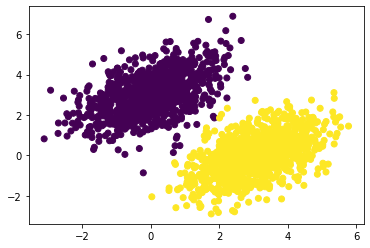

In [ ]:
predicted=model(inputs)
print(predicted)
print(predicted>0.5)
plt.scatter(x=inputs[:,0],y=inputs[:,1],c=predicted[:,]>0.5)

A linear classifier is a 2D line equation: 
$$y=mx+b$$ is similar to: $$Ax+By+c=0$$ where 0 is 0.5 to separate two classes. Therefore: $$w_1x+w_2y+b=0.5$$
$$y=-\frac{w_1}{w_2}x+\frac{(0.5-b)}{w_2}$$

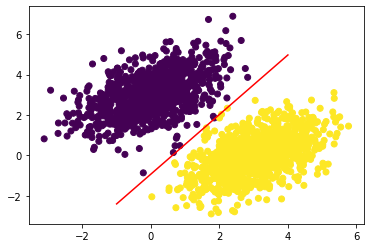

In [ ]:
x=np.linspace(-1,4,100)
y=-weights[0]/weights[1]*x+(0.5-b_intersect)/weights[1]
plt.plot(x,y,"-r")
plt.scatter(x=inputs[:,0],y=inputs[:,1],c=predicted[:,]>0.5)

## 3.6.2. From layers to models

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(optimizer="rmsprop",
               loss="mean_squared_error",
               metrics=["accuracy"])

history = model.fit(inputs,
                    targets,
                    epochs=20,
                    batch_size=128,verbose=2)

Epoch 1/20
16/16 - 0s - loss: 6.8536 - accuracy: 0.3630 - 437ms/epoch - 27ms/step
Epoch 2/20
16/16 - 0s - loss: 6.5546 - accuracy: 0.3550 - 37ms/epoch - 2ms/step
Epoch 3/20
16/16 - 0s - loss: 6.3045 - accuracy: 0.3465 - 35ms/epoch - 2ms/step
Epoch 4/20
16/16 - 0s - loss: 6.0714 - accuracy: 0.3390 - 35ms/epoch - 2ms/step
Epoch 5/20
16/16 - 0s - loss: 5.8419 - accuracy: 0.3335 - 34ms/epoch - 2ms/step
Epoch 6/20
16/16 - 0s - loss: 5.6192 - accuracy: 0.3275 - 42ms/epoch - 3ms/step
Epoch 7/20
16/16 - 0s - loss: 5.4013 - accuracy: 0.3245 - 37ms/epoch - 2ms/step
Epoch 8/20
16/16 - 0s - loss: 5.1875 - accuracy: 0.3245 - 38ms/epoch - 2ms/step
Epoch 9/20
16/16 - 0s - loss: 4.9807 - accuracy: 0.3235 - 35ms/epoch - 2ms/step
Epoch 10/20
16/16 - 0s - loss: 4.7772 - accuracy: 0.3235 - 37ms/epoch - 2ms/step
Epoch 11/20
16/16 - 0s - loss: 4.5773 - accuracy: 0.3245 - 46ms/epoch - 3ms/step
Epoch 12/20
16/16 - 0s - loss: 4.3805 - accuracy: 0.3260 - 48ms/epoch - 3ms/step
Epoch 13/20
16/16 - 0s - loss: 4.18

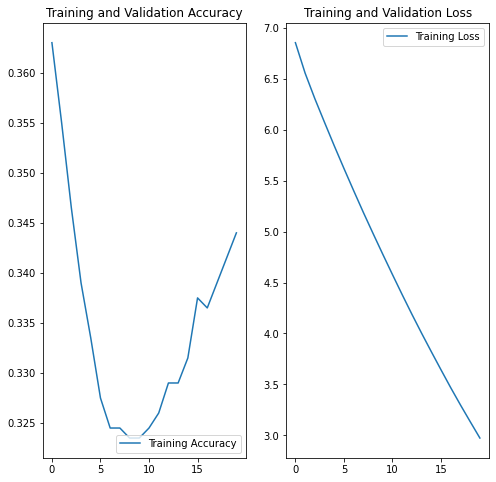

In [ ]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model2=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.1),
               loss=tf.keras.losses.MeanSquaredError(),
               metrics=[tf.keras.metrics.BinaryAccuracy()]
               )
#shuffle
idx=np.random.permutation(len(inputs))
sh_inputs=inputs[idx]
sh_targets=targets[idx]
val_samples=int(0.7*len(inputs))
tr_inputs=sh_inputs[:val_samples]
val_inputs=sh_inputs[val_samples:]
tr_targets=sh_targets[:val_samples]
val_targets=sh_targets[val_samples:]

print(tr_inputs.shape,val_inputs.shape)

hist2=model2.fit(
    x=tr_inputs,
    y=tr_targets,
    epochs=20,
    batch_size=16,
    validation_data=(val_inputs,val_targets)
)

(1400, 2) (600, 2)
Epoch 1/20
88/88 [==============================] - 1s 5ms/step - loss: 0.0827 - binary_accuracy: 0.9707 - val_loss: 0.0298 - val_binary_accuracy: 1.0000
Epoch 2/20
88/88 [==============================] - 0s 4ms/step - loss: 0.0737 - binary_accuracy: 0.9550 - val_loss: 0.0508 - val_binary_accuracy: 0.9950
Epoch 3/20
88/88 [==============================] - 0s 4ms/step - loss: 0.0735 - binary_accuracy: 0.9543 - val_loss: 0.0311 - val_binary_accuracy: 0.9967
Epoch 4/20
88/88 [==============================] - 0s 3ms/step - loss: 0.0730 - binary_accuracy: 0.9521 - val_loss: 0.0913 - val_binary_accuracy: 0.9150
Epoch 5/20
88/88 [==============================] - 0s 4ms/step - loss: 0.0658 - binary_accuracy: 0.9593 - val_loss: 0.0432 - val_binary_accuracy: 0.9983
Epoch 6/20
88/88 [==============================] - 0s 5ms/step - loss: 0.0739 - binary_accuracy: 0.9479 - val_loss: 0.0308 - val_binary_accuracy: 1.0000
Epoch 7/20
88/88 [==============================] - 0s 5m

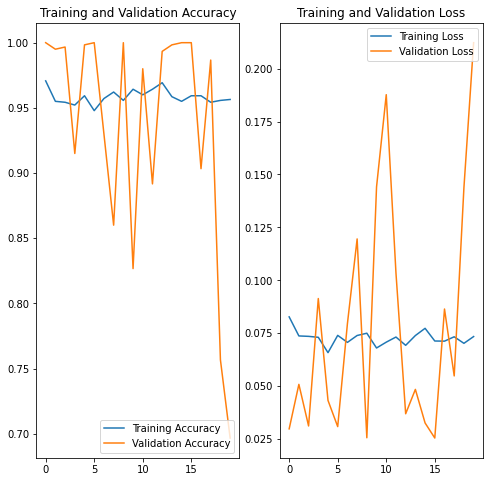

In [ ]:
acc = hist2.history['binary_accuracy']
val_acc = hist2.history['val_binary_accuracy']

loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Separate way to test validation data
loss_metrics=model2.evaluate(val_inputs,val_targets,batch_size=128)
print(loss_metrics)

5/5 [==============================] - 0s 6ms/step - loss: 0.2123 - binary_accuracy: 0.6967
[0.21227826178073883, 0.6966666579246521]


In [ ]:
predictions=model2.predict(val_inputs,batch_size=32)
print(predictions[:10])

19/19 [==============================] - 0s 2ms/step
[[-0.45860302]
 [-0.3012051 ]
 [-0.40747976]
 [ 0.5901604 ]
 [ 0.19457296]
 [ 0.4861674 ]
 [-0.48146582]
 [ 0.4844911 ]
 [ 0.7001542 ]
 [-0.27223617]]
